# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [9]:
# Add code here 🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('airbnb_cleaned.csv')
df.head()

,id,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,33945,20250624032159,2025-06-24,city scrape,Spacious Cosy aprtm very close to Metro!,Apartment located near metro station. Safe nei...,Neighbourhood is alive all day and safe all da...,https://a0.muscache.com/pictures/1a7a1026-f5f1...,146553,https://www.airbnb.com/users/show/146553,...,4.90,4.64,4.81,00000874421,f,2,2,0,0,0.47
1,49489,20250624032159,2025-06-25,city scrape,Ermou 44 - 3bdr apt in the heart of Athens,"Fully furnished, 98 sq.mt., apartment on 44 Er...",The apartment is located at the commercial cen...,https://a0.muscache.com/pictures/9640239/4bfd2...,225612,https://www.airbnb.com/users/show/225612,...,4.87,4.88,4.69,00000876484,t,3,3,0,0,0.84
2,60394,20250624032159,2025-06-25,city scrape,Cosy apartment! Great central Athens location!,Fully furnished cozy apartment in the best nei...,Very centrally located with a feeling of a qui...,https://a0.muscache.com/pictures/477282/db550f...,290864,https://www.airbnb.com/users/show/290864,...,4.97,4.91,4.94,00000508830,f,1,1,0,0,0.29
3,134340,20250624032159,2025-06-25,city scrape,Neo Pagrati Athens Apartment,Little gem with the best of all worlds! Locate...,Our street is a small one with very little tra...,https://a0.muscache.com/pictures/1232312/4edeb...,659406,https://www.airbnb.com/users/show/659406,...,4.93,4.55,4.83,00002821300,f,1,1,0,0,0.36
4,154243,20250624032159,2025-06-25,city scrape,LUSCIOUS ROOF GARDEN IN THE CENTER!,Lovely 40 square-meters one-bedroom penthouse ...,The apartment is conveniently situated in Exar...,https://a0.muscache.com/pictures/1051559/9d6dd...,741851,https://www.airbnb.com/users/show/741851,...,4.88,4.58,4.65,00000532953,f,1,1,0,0,1.28


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



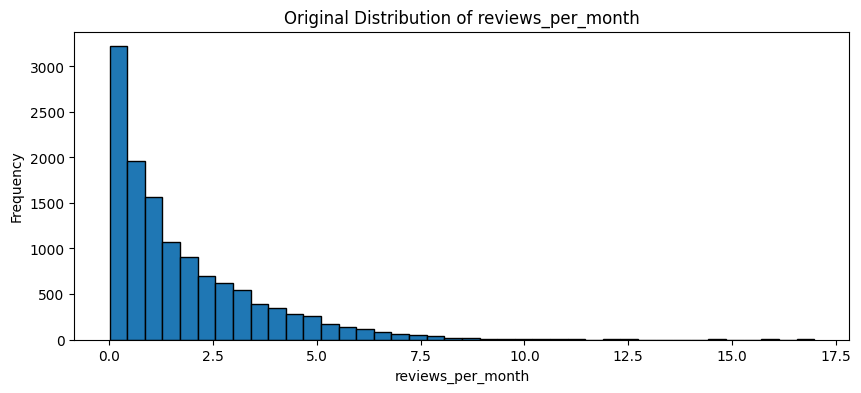

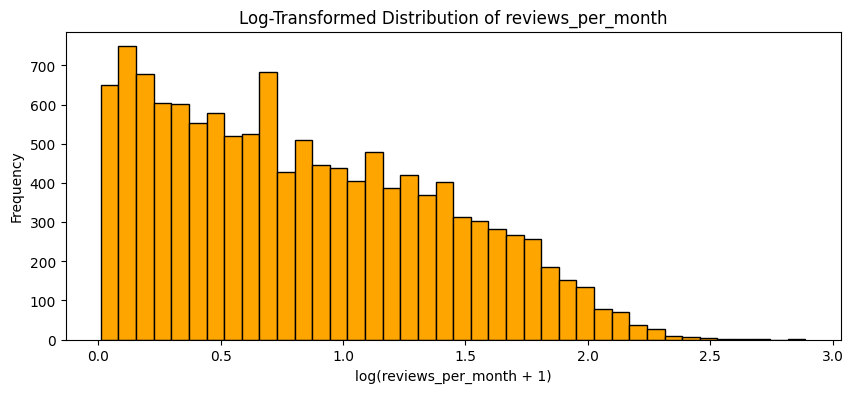

In [10]:
# Add code here 🔧
col = 'reviews_per_month'
# Plot histogram
plt.figure(figsize=(10,4))
plt.hist(df[col].dropna(), bins=40, edgecolor='black')
plt.title(f"Original Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

# apply log transform
df['log_reviews_per_month'] = np.log1p(df[col])

# transformed histogram
plt.figure(figsize=(10,4))
plt.hist(df['log_reviews_per_month'].dropna(), bins=40, edgecolor='black', color='orange')
plt.title(f"Log-Transformed Distribution of {col}")
plt.xlabel("log(reviews_per_month + 1)")
plt.ylabel("Frequency")
plt.show()


### ✍️ Your Response: 🔧
1. I examined the reviews_per_month. It shows how often listings recieve reviews and is right-skewed. This means most listings recieve few reviews per month with a few get many reviews per month.

2. I applied a logarithmic transformation as it compresses big values while also keeping smaller ones interpretable.

3. Before the transformation the histogram showed a sharp peak near zero and has a long tail making it hard to identify meaningful variation. After the logarithmic transformation, the distribution is easier to visualize as its more symmetric. Overall I made the data more easy to interpret and suitable for regression and other statistical/analytical techniques down the road.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Created scalers
minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Min-Max scale
df['price_minmax'] = minmax_scaler.fit_transform(df[['price']])


# Z-score scale
df['minimum_nights_zscore'] = zscore_scaler.fit_transform(df[['minimum_nights']])

# show
df[['price', 'price_minmax', 'minimum_nights', 'minimum_nights_zscore']].head()



,price,price_minmax,minimum_nights,minimum_nights_zscore
0,35.0,0.000605,4,0.163770
1,160.0,0.003896,2,-0.057723
2,50.0,0.001000,6,0.385262
3,39.0,0.000711,3,0.053024
4,70.0,0.001527,2,-0.057723


### ✍️ Your Response: 🔧
1. I scaled the price column using min-max scaling and the minimum_nights column using Z-score normalization.

2. Scaled values make variables comparable and improve the overall performance of the model.

3. Airbnb data scientists, analysts, and other data professionals can use this data to build more accurate and fair pricing models which they can then extract insights from.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [12]:
# Add code here 🔧
# column to group
col = 'reviews_per_month'

# Define bins
bins = [0, 0.3, 1.0, df[col].max()]
labels = ['Low', 'Medium', 'High']

# Create new column (categorical)
df['review_activity_level'] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

# Check
df[[col, 'review_activity_level']].head(10)


,reviews_per_month,review_activity_level
0,0.47,Medium
1,0.84,Medium
2,0.29,Low
3,0.36,Medium
4,1.28,High
5,0.48,Medium
6,0.29,Low
7,4.64,High
8,0.02,Low
9,0.40,Medium


### ✍️ Your Response: 🔧
1. I grouped the column reviews_per_month into three categories: Low, Medium, and High.

2. I did this grouping due to its utility in simplifying analysis and enabling the more clear visualization of engagement patterns.

3. Airbnb's marketing team can now easily segment these lisgings by review activity in order to achieve business objectives such as targeted campaigns to do x.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [13]:
# Add code here 🔧
# cost per night variable
df['cost_per_night'] = df['price'] / df['minimum_nights']

# flag for long term stays
df['long_term_flag'] = df['minimum_nights'].apply(lambda x: 1 if x >= 30 else 0)

# Check
df[['price', 'minimum_nights', 'cost_per_night', 'long_term_flag']].head()


,price,minimum_nights,cost_per_night,long_term_flag
0,35.0,4,8.750000,0
1,160.0,2,80.000000,0
2,50.0,6,8.333333,0
3,39.0,3,13.000000,0
4,70.0,2,35.000000,0


### ✍️ Your Response: 🔧 🔧
1. I created the new column cost_per_night which is price divided by minimum_nights and long_term_flag which displays 1 if minimum stay is greater than or equal to 30 days, which I've deemed long term.

2. The people who would use these are Airbnb hosts as well as Airbnb managers.

3. These could help the afformentioned users make better decisions by optimizing pricing and idenfitying which listings appeal to long-term guests.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [14]:
# Add code here 🔧
# Encode col
col = 'room_type'

# Applies one-hot encoding
df_encoded = pd.get_dummies(df, columns=[col], prefix='room_type')

# Check
df_encoded.filter(like='room_type').head()

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


### ✍️ Your Response: 🔧
1. The column I encoded is room_type because its a categorical column with no natural order.
2. I used the one-hot encoding method to create binary columns for each room type.
3. This encoding enhances business value as it enables Airbnb's existing pricing models and dashbords to quantify room-type effects based on revenue as well as booking rates.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. The most interesting, and important transformation was scaling and encoding for me as they make Airbnb's raw data ready and accurate for predictive modeling later on.

2. The most useful change in my opinion was the new columns cost_per_night and long_term_flag as together they help hosts and analysts understand pricing as well as long-term stay patterns.

3. The next steps for a dashboard would be to visualize pricing, occupancy, and review trends across multiple neighborhoods in order to support data-driven decision making.

4. To connect this assignment back to my customized learning outcome, I feel that demonstrating and applying real-world data transformation and analysis furthers my preparedness and understanding of the data analytics career field, a field that I have a great deal of interest in and one that is at the center of each of my learning outcomes.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [17]:
!jupyter nbconvert --to html "assignment_07_LoreSpencer.ipynb"

[NbConvertApp] Converting notebook assignment_07_LoreSpencer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 415371 bytes to assignment_07_LoreSpencer.html
